In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as pt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r'C:\Users\ADMIN\Downloads\haberman.csv')

In [3]:
df.columns=["Age","Year","Nodes","Survival"]

In [4]:
df.head(3)

,Age,Year,Nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1


In [5]:
df.shape

(305, 4)

In [6]:
df.isnull().sum()

Age         0
Year        0
Nodes       0
Survival    0
dtype: int64

In [7]:
df.duplicated().value_counts()#---- these can be genuine possibilities

False    288
True      17
dtype: int64

In [8]:
df.Survival.value_counts()

1    224
2     81
Name: Survival, dtype: int64

In [9]:
df=df.replace([1,2],[0,1])

In [10]:
df.describe()

,Age,Year,Nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,3.839344,0.265574
std,10.744024,3.254078,7.283978,0.442364
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,0.000000,0.000000
75%,61.000000,66.000000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [11]:
#age= 44 to 83 year from 1960 to 1969 nodes 0-4 *** as there is so much differenece bt 75% and max vale ie 48 
# nodes have higher count density 


# Univariate Analysis 


1. Survival 

In [12]:
df.Survival.value_counts(1)

0    0.734426
1    0.265574
Name: Survival, dtype: float64

In [13]:
# There are 27 per cent of the people who are living less than 5 years so it can be say that the data is imbalanced

<AxesSubplot:xlabel='Survival', ylabel='count'>

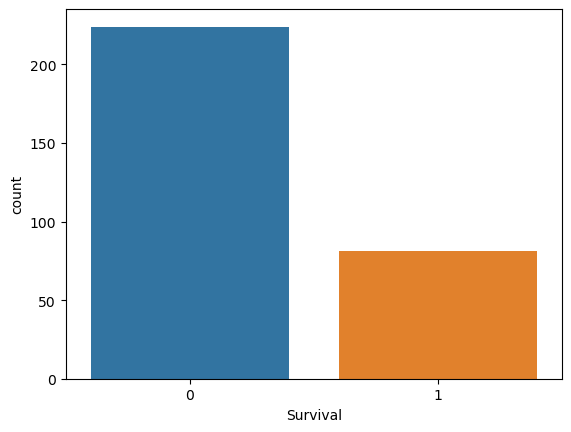

In [14]:
sb.countplot(x="Survival",data=df)

## 2. Age Factor

0.15898611605406873


<AxesSubplot:xlabel='Age', ylabel='Count'>

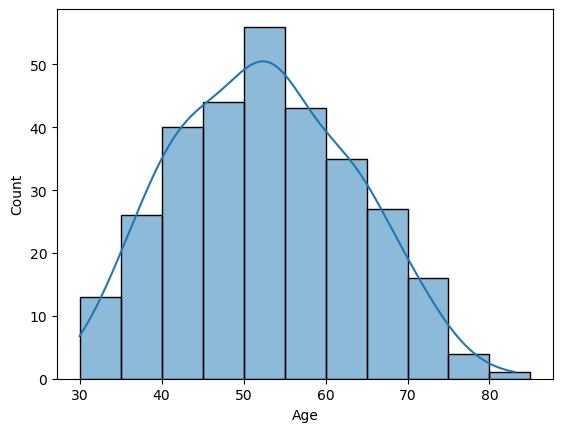

In [15]:
print(df.Age.skew())
sb.histplot(x="Age",data=df,binwidth=5,kde=True)

In [16]:
# the maximum number of people who got operated were belong to the age group 50 to 55 


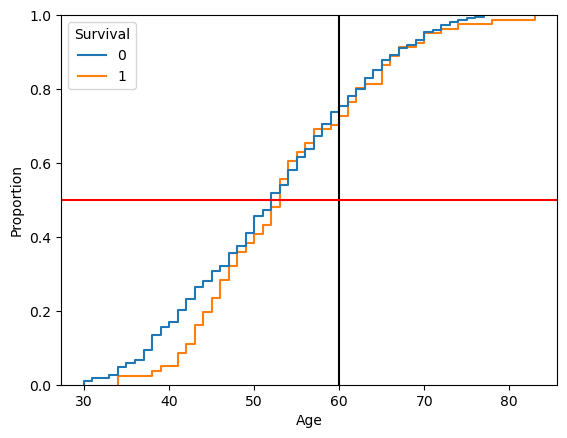

In [17]:
sb.ecdfplot(x="Age",data=df,hue="Survival")
pt.axvline(60,c="black")                 # around 70  per cent of the people belongs to the age of 60 or less than that.
pt.axhline(0.5,c="red")

## 3. Operation year

<AxesSubplot:>

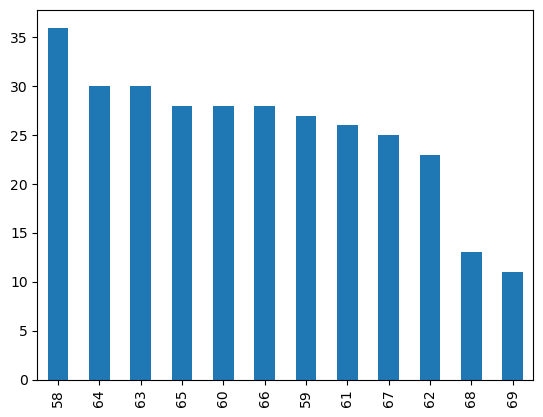

In [18]:
df.Year.value_counts().plot(kind="bar")

## 4.Lymph Nodes 

<AxesSubplot:>

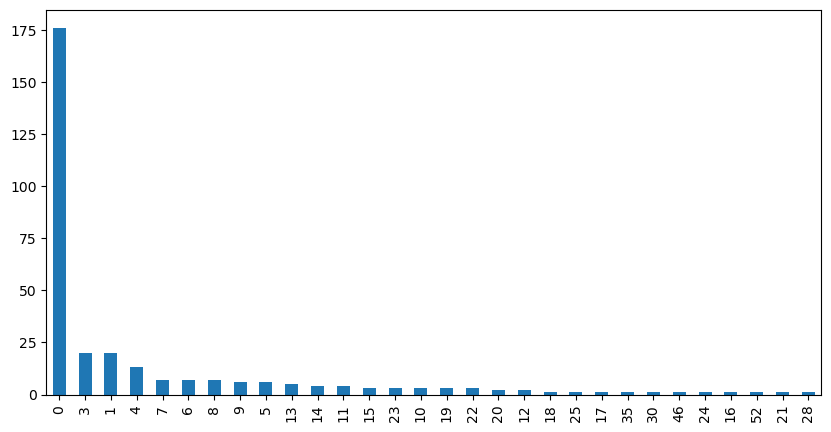

In [19]:
pt.figure(figsize=(10,5))
df.Nodes.value_counts().plot(kind="bar")

2.940405369162834


<AxesSubplot:xlabel='Nodes', ylabel='Count'>

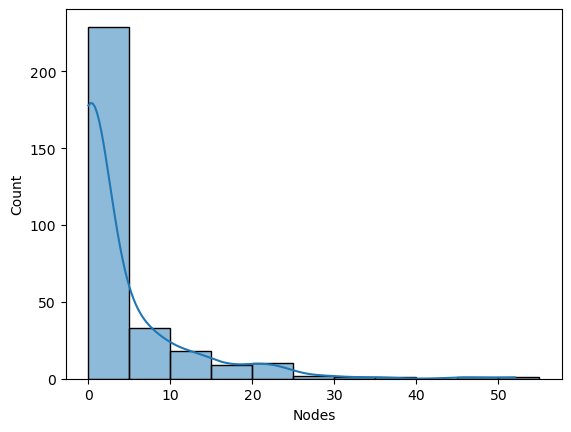

In [20]:
print(df.Nodes.skew())
sb.histplot(x="Nodes",data=df,binwidth=5,kde=True)

# Bivariate Analysis

<AxesSubplot:xlabel='Survival', ylabel='Age'>

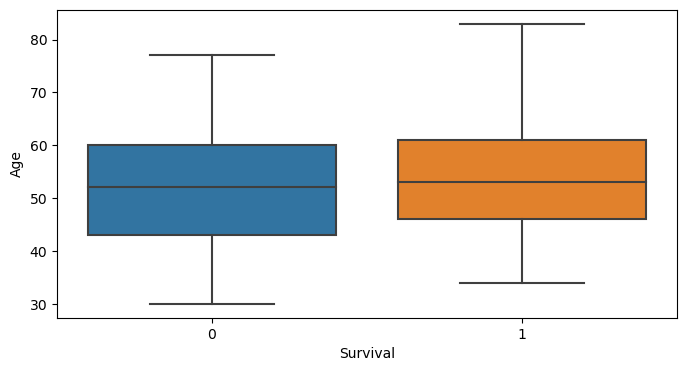

In [21]:
# AGE AND SURVIVAL 

pt.figure(figsize=(8,4))
sb.boxplot(x="Survival",y="Age",data=df)


In [22]:
#  the patients with the age more than 70 or around 77 were couldnot able to surviv more than 5 yrs. 
# the people who are of age less than 33 lived more than 5 years 

Text(0.5, 1.0, 'age-survival percentage')

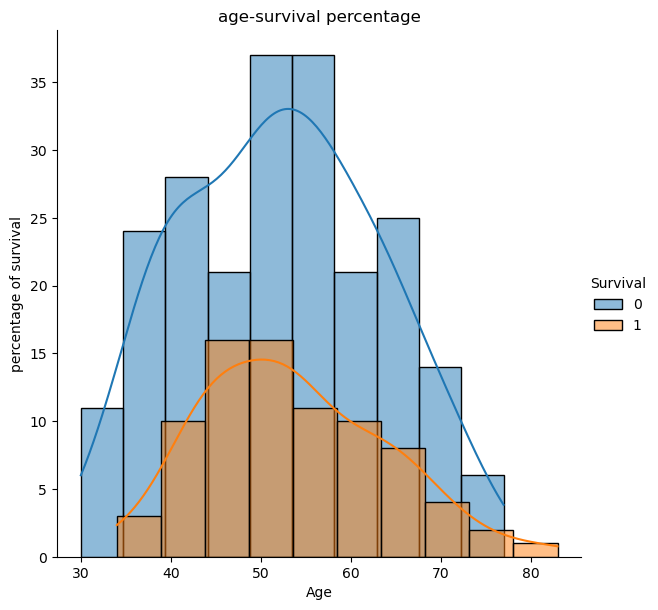

In [23]:
sb.FacetGrid(df,hue="Survival",height=6).map(sb.histplot,"Age",bins=10,kde=True).add_legend()
pt.xlabel("Age")
pt.ylabel("percentage of survival")
pt.title("age-survival percentage")

# maximum percentage of people belong to the age 44 to 53 not survived more than 5 yrs 
#  the patients with the age more than 70 or around 77 were couldnot able to surviv more than 5 yrs. 
# the people who are of age less than 33 lived more than 5 years 

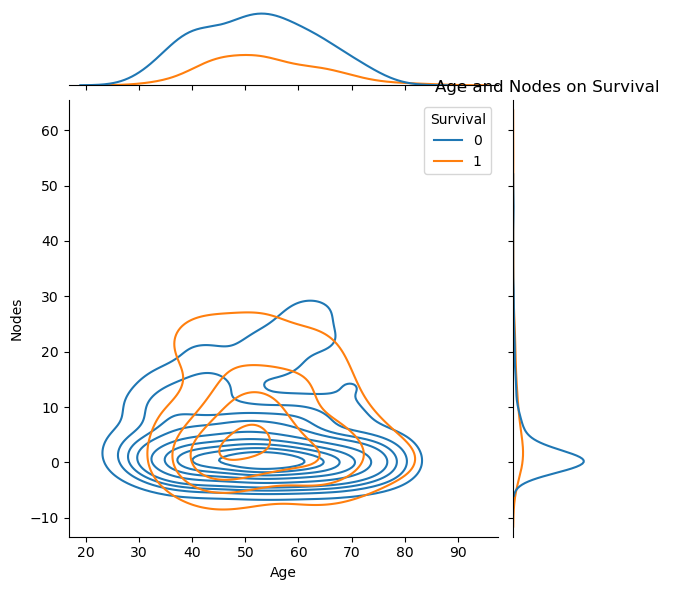

In [24]:
sb.jointplot(x="Age",y="Nodes",data=df,hue="Survival",kind='kde')
pt.title("Age and Nodes on Survival ")
pt.show()


# the age between 43-53 and 

<AxesSubplot:xlabel='Survival', ylabel='Nodes'>

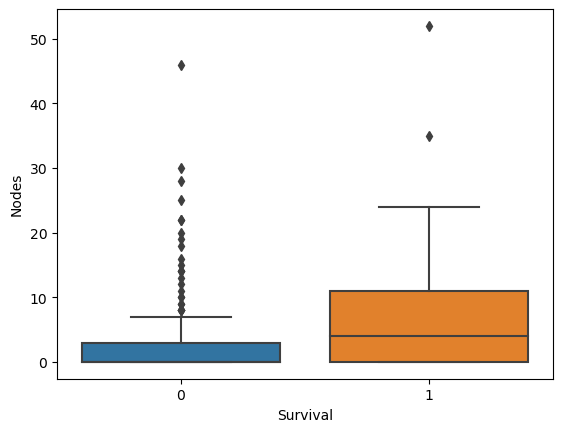

In [25]:
sb.boxplot(x="Survival",y="Nodes",data=df)

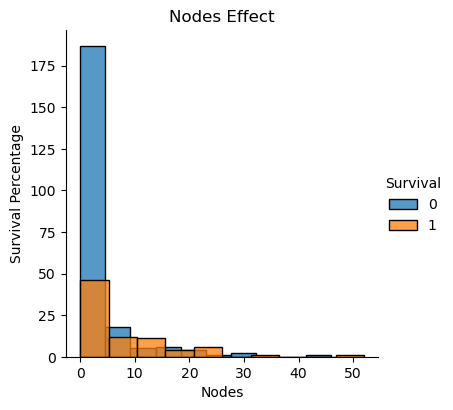

In [26]:
sb.FacetGrid(df,hue="Survival",height=4).map(sb.histplot,"Nodes",bins=10).add_legend()
pt.xlabel("Nodes")
pt.ylabel("Survival Percentage")
pt.title("Nodes Effect")
pt.show()

# people with nodes 10-52 wll live less than five years

In [27]:
df.groupby("Nodes")["Survival"].sum().sort_values(ascending=False)

Nodes
0     27
3      7
1      5
13     4
5      4
9      4
4      3
6      3
23     3
11     3
15     2
19     2
8      2
7      2
24     1
20     1
22     1
21     1
35     1
52     1
17     1
14     1
12     1
10     1
18     0
25     0
28     0
30     0
46     0
16     0
Name: Survival, dtype: int64

In [28]:
df.Nodes.value_counts().sort_values(ascending=False)

0     176
1      20
3      20
4      13
7       7
6       7
8       7
9       6
5       6
13      5
14      4
11      4
10      3
22      3
19      3
23      3
15      3
20      2
12      2
18      1
25      1
17      1
35      1
30      1
46      1
24      1
16      1
52      1
21      1
28      1
Name: Nodes, dtype: int64

In [30]:
# for 0 nodes, the total number of people are 176 out of which the number of people couldnot survive 
 #more than 5 years are 27 which indicates that
    
    #27/176=0.15 shows that there is only 15 per cent chance that the person with one node will not live nore than 5 yrs

In [ ]:
27/176

In [ ]:
sb.FacetGrid(df,hue="Survival",height=4).map(sb.histplot,"Year",bins=10,kde=True).add_legend()
pt.xlabel("Year")
pt.ylabel("Survival Percentage")
pt.title("Year Effect")
pt.show()

In [ ]:
df.groupby('Survival')["Year"].value_counts().unstack()

# 1965-46% 
#1958-33% #1959-45% 

# about 46 % of the people died during 1965th year 

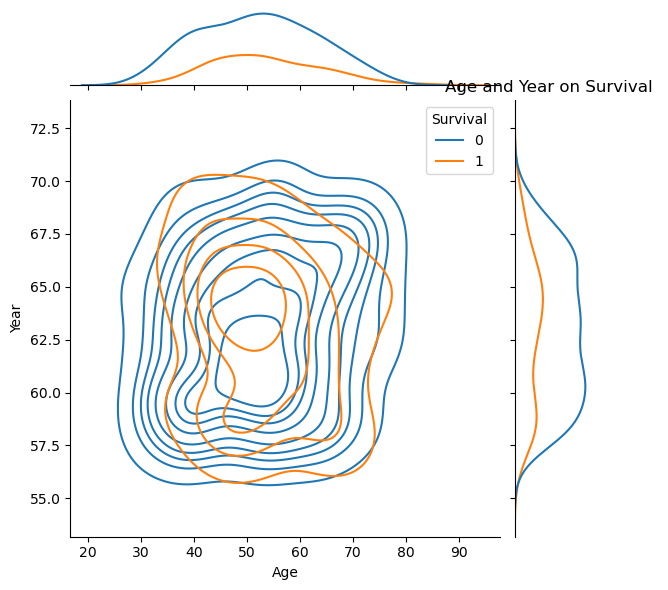

In [31]:
sb.jointplot(x="Age",y="Year",data=df,hue="Survival",kind='kde')
pt.title("Age and Year on Survival ")
pt.show()

# Multivariate Analysis

<AxesSubplot:>

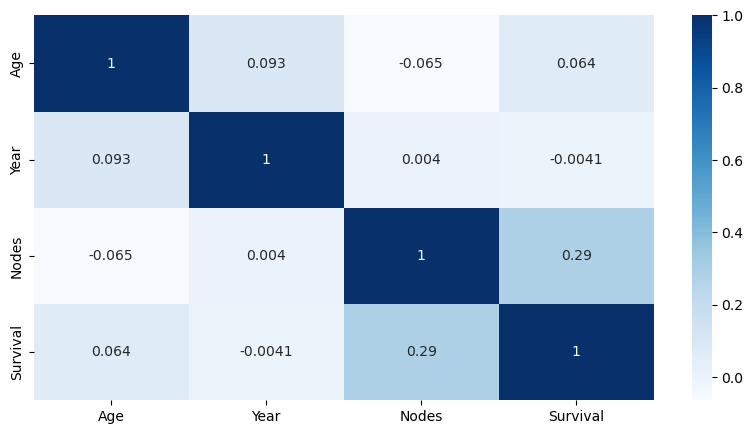

In [33]:
pt.figure(figsize=(10,5))
corr=df.corr()
sb.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="Blues",annot=True)

# nodes and survival are  positively correlated to the extent of 29 per cent 